------------------------------
## MUHAMMAD AMIN NADIM
https://muhammad-amin-nadim.github.io/
------------------------------


# Gradient Descent

GD is an algorithm that is used to solve the machine learning problems such as linear regression.

Simply, the goal of linear regression is to fit a line of corresponding given dataset or points. 

Let's consider that we want to fit a line for the points showed with the graphic below.

| x (input)| y (output)|
| :----- | :----- |
| 10.0   | 8.04   |
| 8.0    | 6.95   |
| 13.0   | 7.58   |
| 9.0    | 8.81   |
| 11.0   | 8.33   |
| 14.0   | 9.96   |
| 6.0    | 7.24   |
| 4.0    | 4.26   |
| 12.0   | 10.84  |
| 7.0    | 4.82   |
| 5.0    | 5.68   |

<img src="datasetgraph.png" />

In [1]:
# dataset
y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
x = [10.0, 8.00, 13.0, 9.00, 11.0, 14.0, 6.00, 4.00, 12.00, 7.00, 5.00]

As you can guess, we are talking about a line and a line has an equation like $y = mx + b$. Here the coefficient of $x$, $m$ is the slope of the line and $b$ is y-intersect. We can simply say that the fittest line (the solution of linear regression) is strictly related to the values of $m$ and $b$. That's why it is obvious that we have to find the best pair of $m$ and $b$ values.

The common approach to finding the best values is to use a function named _error function_ or _cost function_ to measure how fit the line is.

\begin{equation*}
Error_{m, b} = \frac{1}{N} \sum_{i=1}^N \left( y_i - \left(m x_i + b \right) \right)^2
\end{equation*}

The squared error function makes us enable to calculate the error value positive and differentiate the error function.

In [2]:
def computeError(m, b):
    # initialize total error
    error_m_b = 0.0
    
    # loop within the dataset
    for i in range(len(x)):
        x_i = x[i]
        y_i = y[i]
        
        # compute the error for a single point
        # and add it to the total error
        error_m_b += (y_i - (m * x_i + b)) ** 2
    # end of for loop
    
    # compute the mean of the error for all dataset
    error_m_b = error_m_b / float(len(x))
    return error_m_b
# end of def computeError

# compute error for the line corresponded by given m and b values
print("total error:", computeError(0.9, 0.1))

total error: 3.3391545454545453


It is simple to compute the total error for a certain line. But we need to find the direction of total error to determine what we are going to do. Are we going to reduce the slope and y-intersect or raise them? Is total error increasing or decreasing? So we have to calculate the changes of the total error. As you know this means the first derivative of the error function.

<img src="x2graph.png" style="height:300px;width:550px"/>

However, the error function has two separate parameters. Which parameter are we going to differentiate it with respect to? We are going to differentiate it with respect to two parameters separately by the partial derivative. Partial derivative means that simply we approach the other parameter (variable) as a constant (for more information [wiki](https://en.wikipedia.org/wiki/Partial_derivative)). When we differentiate the error function with respect to two separate parameters partially, we will have two equations such below.

\begin{equation}
\frac{\partial E}{\partial m} = \frac{2}{N} \sum_{i=1}^N -x_i \left( y_i - \left( m x_i + b \right) \right)
\end{equation}

----------------------
\begin{equation}
\frac{\partial E}{\partial b} = \frac{2}{N} \sum_{i=1}^N - \left( y_i - \left( m x_i + b \right) \right)
\end{equation}

Let's look at how the code of these equations looks like.

In [3]:
# definition of the function to compute the gradient of m.
def gradientM(m, b):
    # setting default value of gradient
    gradient_m = 0.0
    
    # loop within the dataset
    for i in range(len(x)):
        x_i = x[i]
        y_i = y[i]
        
        # compute the first derivative of the error funtion
        # with respect to m
        gradient_m += -x_i * (y_i - (m * x_i + b))
    # end of for loop
    
    # mean of total error
    gradient_m = 2 * gradient_m / float(len(x))
    return gradient_m
# end of def gradientM


# definition of the function to compute the gradient of b.
def gradientB(m, b):
    # setting default value of gradient
    gradient_b = 0.0
    
    # loop within the dataset
    for i in range(len(x)):
        x_i = x[i]
        y_i = y[i]
        
        # compute the first derivative of the error funtion
        # with respect to b
        gradient_b += -(y_i - (m * x_i + b))
    # end of for loop
    
    # mean of total error
    gradient_b = 2 * gradient_b / float(len(x))
    return gradient_b
# end of def gradientB

print("gradient_m: ", gradientM(1, 0))
print("gradient_b: ", gradientB(1, 0))

gradient_m:  36.98181818181817
gradient_b:  2.998181818181818


Now we have enough information how to compute the gradient of the line and determine how fit it is. So what is next that we are going to do? We are going to use these gradient results that we computed to determine the next values of $m$ and $b$. That's why we need a new equation to determine new values of $m$ and $b$ parameters.

\begin{align}
& m_0 = \text{initial value} \\
& \text{for} \; \tau = 1, 2,\dots \\
& m_{\tau} = m_{\tau-1} - \eta \nabla E(m_{\tau-1})
\end{align}

-------------------------------
\begin{align}
& b_0 = \text{initial value} \\
& \text{for} \; \tau = 1, 2,\dots \\
& b_{\tau} = b_{\tau-1} - \eta \nabla E(b_{\tau-1})
\end{align}

* $\eta$: Learning rate is a parameter of the algorithm
* $m$ and $b$: the variable is the parameters of the Model. _They represent scalar variables._
* $y$: targets (outputs)
* $x$: inputs

Yes, above you can see the calculation methods for new $m$ and $b$ values. As you know $\nabla E(b_{\tau-1})$ and $\nabla E(m_{\tau-1})$ mean derivative. Thus, we can write these equations like;

\begin{align}
\nabla E(m_{\tau-1}) = \frac{2}{N} \sum_{i=1}^N -x_i \left( y_i - \left( m_{\tau-1} x_i + b_{\tau-1} \right) \right)
\end{align}

-------------------------------
\begin{align}
\nabla E(b_{\tau-1}) = \frac{2}{N} \sum_{i=1}^N - \left( y_i - \left( m_{\tau-1} x_i + b_{\tau-1} \right) \right)
\end{align}

In [4]:
def gradientStep(eta, m, b):
    # compute the derivate with respect to m and b
    dM = gradientM(m, b)
    dB = gradientB(m, b)
    
    # compute new value of m and b
    m = m - eta * dM
    b = b - eta * dB
    
    return m, b
# end of def gradientStep

# iteration count
N = 101

# learning rate
eta = 0.01

# initial values
m = b = 0

# Let's start iterating
for i in range(N):
    if i % 10 == 0:
        print(i, "\t error:", computeError(m, b))
    m, b = gradientStep(eta, m, b)
# end of for loop

0 	 error: 60.01569999999999
10 	 error: 3.8288460786805696
20 	 error: 2.159837161759056
30 	 error: 2.0758079629206465
40 	 error: 2.039328445552182
50 	 error: 2.005681412537383
60 	 error: 1.9735062215911647
70 	 error: 1.942704101310751
80 	 error: 1.9132154562486745
90 	 error: 1.884984247675222
100 	 error: 1.8579568559211126


As you can see that we accomplished finding the fittest line out. Let's how it looks like :)

In [5]:
# python library for plotting
import matplotlib.pylab as plt

# iteration count
N = 100

# learning rate
eta = 0.01

# initial values
m = b = 0

# lists to keep y-values of line
line = []

# Let's start iterating
for i in range(N):
    m, b = gradientStep(eta, m, b)
# end of for loop

for i in range(len(x)):
    line.append(m * x[i] + b)
# end of for loop

print("Parameters of the fittest line:")
print("m:", m)
print("b:", b)

# drawing of graph.
plt.title("Fittest Line")
plt.plot(x, y, "go")
plt.plot(x, line)
plt.show()

Parameters of the fittest line:
m: 0.7327729535801762
b: 0.6502302349598857


<Figure size 640x480 with 1 Axes>

Let's see how the error level changes through the iterations.

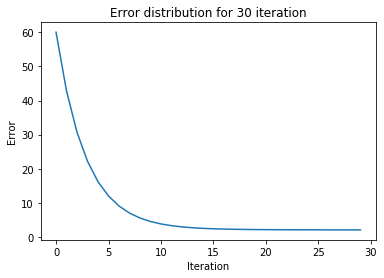

In [6]:
# python library for plotting
import matplotlib.pylab as plt

# iteration count
N = 30

# learning rate
eta = 0.01

# initial values
m = b = 0

# lists to keep the error and the iteration values.
errors = []
Ns = []

# Let's start iterating
for i in range(N):
    errors.append(computeError(m, b))
    Ns.append(i)
    m, b = gradientStep(eta, m, b)
# end of for loop

# drawing of graph.
plt.title("Error distribution for %s iteration" % N)
plt.ylabel("Error")
plt.xlabel("Iteration")
plt.plot(Ns, errors)
plt.show()

It is obvious that we can carry out a few optimization for the GD algorithm. For example, extending the steps of GD. This idea leads us to the notion of momentum.

## Gradient Descent with momentum

We are going to denote $\eta$ as $\alpha$ now on and for momentum calculation, we have to do a few modification in GD equation.

$p$ will denote the momentum;

\begin{align}
& p_{\tau} = \nabla E(m_{\tau-1}) + \beta p_{\tau-1} \\
& m_{\tau} = m_{\tau-1} - \alpha p_{\tau} \\
& m_{\tau} = m_{\tau-1} - \alpha \left( \nabla E(m_{\tau-1}) + \beta p_{\tau-1} \right)
\end{align}

------------------------------------------
\begin{align}
& p_{\tau} = \nabla E(b_{\tau-1}) + \beta p_{\tau-1} \\
& b_{\tau} = b_{\tau-1} - \alpha p_{\tau} \\
& b_{\tau} = b_{\tau-1} - \alpha \left( \nabla E(b_{\tau-1}) + \beta p_{\tau-1} \right) \\
\end{align}

$\beta$ will be our momentum coefficient. When $\beta=0$, we recover GD.

0 	 error: 60.01569999999999
10 	 error: 32.94127110737379
20 	 error: 14.501623737861456
30 	 error: 5.786070865606438
40 	 error: 2.5509966153706385
50 	 error: 1.5774154763500476
60 	 error: 1.338840949345472
70 	 error: 1.288118708474226
80 	 error: 1.2736507445172964
90 	 error: 1.2651044588940537
100 	 error: 1.2590759027871392


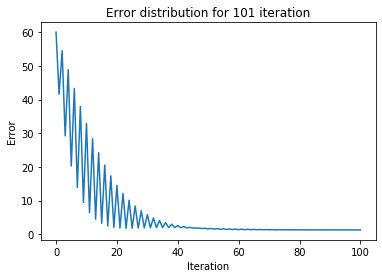

In [7]:
def momentumM(m, b, p_m, beta):
    gradient_m = gradientM(m, b)
    momentum_m = gradient_m + beta * p_m
    return momentum_m
# end of def momentumM

def momentumB(m, b, p_b, beta):
    gradient_b = gradientB(m, b)
    momentum_b = gradient_b + beta * p_b
    return momentum_b
# end of def momentumB

def gradientStepWithMomentum(alpha, m, b, p_m0, p_b0, beta):
    # compute the momentum values of m and b
    p_m = momentumM(m, b, p_m0, beta)
    p_b = momentumB(m, b, p_b0, beta)
    
    # compute new values of m and b
    m = m - alpha * p_m
    b = b - alpha * p_b
    
    return m, b, p_m, p_b
# end of def gradientStepWithMomentum

# iteration count
N = 101

# learning rate
alpha = 0.01

# momentum coefficient
beta = 0.9

# initial values
m = b = 0
p_m = p_b = 1

# lists to keep the error and the iteration values.
errors = []
Ns = []

# Let's start iterating
for i in range(N):
    # append these value for plotting grapghic
    errors.append(computeError(m, b))
    Ns.append(i)
    
    if i % 10 == 0:
        print(i, "\t error:", computeError(m, b))
        
    m, b, p_m, p_b = gradientStepWithMomentum(alpha, m, b, p_m, p_b, beta)
# end of for loop

# drawing of graph.
plt.title("Error distribution for %s iteration" % N)
plt.ylabel("Error")
plt.xlabel("Iteration")
plt.plot(Ns, errors)
plt.show()

## Gradient Descent with adaptive alpha

0 	 error: 60.01569999999999
10 	 error: 3.934350308414748
20 	 error: 6.90880324724523
30 	 error: 7.393997601591168
40 	 error: 4.72413001453322
50 	 error: 3.129228958275091
60 	 error: 2.5057963081608374
70 	 error: 2.0123751845498736
80 	 error: 1.7734996712392657
90 	 error: 1.76418748811383
100 	 error: 1.6437117355804072


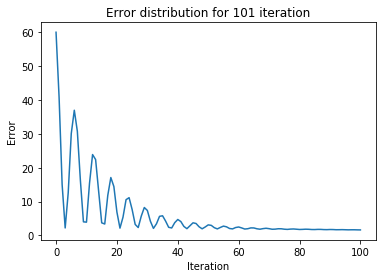

In [8]:
import math

def momentumM(m, b, p_m, beta):
    gradient_m = gradientM(m, b)
    momentum_m = gradient_m + beta * p_m
    return momentum_m
# end of def momentumM

def momentumB(m, b, p_b, beta):
    gradient_b = gradientB(m, b)
    momentum_b = gradient_b + beta * p_b
    return momentum_b
# end of def momentumB

def gradientStepWithMomentum(alpha, m, b, p_m0, p_b0, beta):
    # compute the momentum values of m and b
    p_m = momentumM(m, b, p_m0, beta)
    p_b = momentumB(m, b, p_b0, beta)
    
    # compute new values of m and b
    m = m - alpha * p_m
    b = b - alpha * p_b
    
    return m, b, p_m, p_b
# end of def gradientStepWithMomentum

def adaptAlpha(currentError, prevError, alpha):
    newAlpha = alpha
    if currentError > prevError:
        newAlpha = alpha * 0.9
    else:
        newAlpha = alpha * 1.1
    return newAlpha
# end of def adaptAlpha

# iteration count
N = 101

# learning rate
alpha = 0.001

# momentum coefficient
beta = 0.9

# initial values
m = b = 0
p_m = p_b = 1

# lists to keep the error and the iteration values.
errors = []
Ns = []

# keeps previous error value.
prevError = math.inf

# Let's start iterating
for i in range(N):
    # compute current error value
    currentError = computeError(m, b)
    
    # append these value for plotting grapghic
    errors.append(currentError)
    Ns.append(i)
    
    # adapt alpha
    if i > 0:
        alpha = adaptAlpha(currentError, prevError, alpha)
    prevError = currentError
    
    if i % 10 == 0:
        print(i, "\t error:", currentError)
        
    m, b, p_m, p_b = gradientStepWithMomentum(alpha, m, b, p_m, p_b, beta)
# end of for loop

# drawing of graph.
plt.title("Error distribution for %s iteration" % N)
plt.ylabel("Error")
plt.xlabel("Iteration")
plt.plot(Ns, errors)
plt.show()